In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
from matplotlib.colors import ListedColormap

In [2]:
df =pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\penguins_binary.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,51.211594,10.784101,198,6536,female
1,Gentoo,Biscoe,54.473814,16.435158,208,4077,female
2,Adelie,Biscoe,44.907998,25.894140,204,3665,female
3,Adelie,Dream,26.304201,13.736113,160,8000,male
4,Adelie,Biscoe,54.870708,14.800691,210,5418,male
...,...,...,...,...,...,...,...
1196,Gentoo,Biscoe,39.129537,15.963502,226,3325,female
1197,Adelie,Biscoe,31.841796,21.379096,181,4030,female
1198,Adelie,Torgersen,41.027337,29.101908,213,4013,female
1199,Gentoo,Biscoe,47.544529,16.402925,210,5488,female


In [3]:
# Drop two columns you don't want (like island and sex instead of SepalLength/Width)
df = df.drop(['island', 'sex'], axis=1)

# Drop target label 'species' (like Iris 'Species') to keep only numeric features
data = df.drop(['species'], axis=1)
data


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,51.211594,10.784101,198,6536
1,54.473814,16.435158,208,4077
2,44.907998,25.894140,204,3665
3,26.304201,13.736113,160,8000
4,54.870708,14.800691,210,5418
...,...,...,...,...
1196,39.129537,15.963502,226,3325
1197,31.841796,21.379096,181,4030
1198,41.027337,29.101908,213,4013
1199,47.544529,16.402925,210,5488


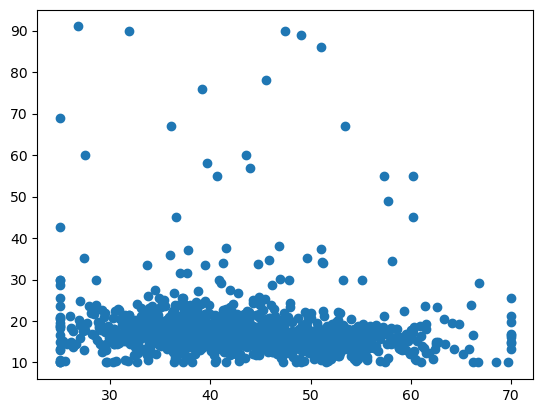

In [4]:
plt.scatter(data.bill_length_mm, data.bill_depth_mm)

In [5]:
S = MinMaxScaler()
data = S.fit_transform(data)
data

array([[0.58247986, 0.00968025, 0.38      , 0.756     ],
       [0.65497365, 0.0794464 , 0.48      , 0.34616667],
       [0.44239995, 0.19622395, 0.44      , 0.2775    ],
       ...,
       [0.35616305, 0.23582603, 0.53      , 0.3355    ],
       [0.50098953, 0.07904846, 0.5       , 0.58133333],
       [0.41170761, 0.61728395, 0.53      , 0.46733333]])

In [6]:
data = pd.DataFrame(data, columns=['A','B','C','D'])
data

,A,B,C,D
0,0.582480,0.009680,0.38,0.756000
1,0.654974,0.079446,0.48,0.346167
2,0.442400,0.196224,0.44,0.277500
3,0.028982,0.046125,0.00,1.000000
4,0.663794,0.059268,0.50,0.569667
...,...,...,...,...
1196,0.313990,0.073623,0.66,0.220833
1197,0.152040,0.140483,0.21,0.338333
1198,0.356163,0.235826,0.53,0.335500
1199,0.500990,0.079048,0.50,0.581333


In [7]:
model = KMeans(n_clusters=2)
model.fit(data)

D:\Anaconda_Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Anaconda_Navigator\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Anaconda_Navigator\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

KMeans(n_clusters=2)

In [8]:
y = model.fit_predict(data)
y

D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


array([0, 0, 1, ..., 1, 0, 0])

In [9]:
data['cluster'] = y
data

,A,B,C,D,cluster
0,0.582480,0.009680,0.38,0.756000,0
1,0.654974,0.079446,0.48,0.346167,0
2,0.442400,0.196224,0.44,0.277500,1
3,0.028982,0.046125,0.00,1.000000,1
4,0.663794,0.059268,0.50,0.569667,0
...,...,...,...,...,...
1196,0.313990,0.073623,0.66,0.220833,1
1197,0.152040,0.140483,0.21,0.338333,1
1198,0.356163,0.235826,0.53,0.335500,1
1199,0.500990,0.079048,0.50,0.581333,0


In [10]:
cent=model.cluster_centers_
cent

array([[0.54720776, 0.08221737, 0.59108159, 0.52756705],
       [0.30507526, 0.1121545 , 0.29154303, 0.27726335]])

<Axes: xlabel='A', ylabel='B'>

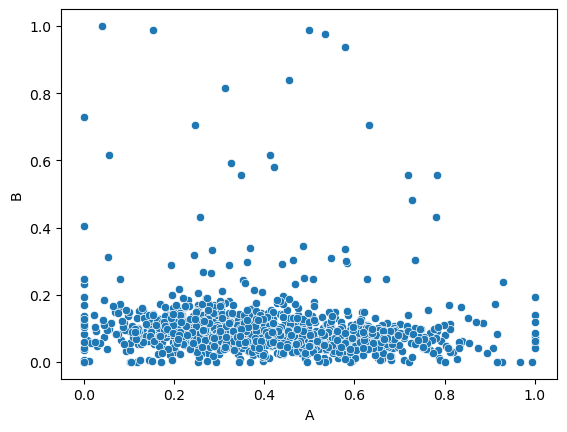

In [11]:
Counter(model.labels_)
Counter({1 : 50, 0 : 100})
sns.scatterplot(data=data, x='A', y='B')

<Axes: xlabel='A', ylabel='B'>

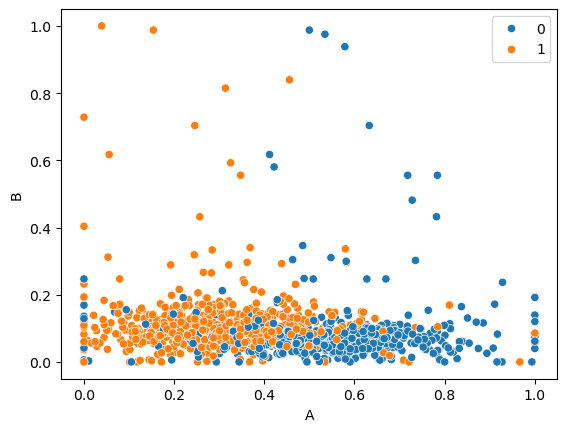

In [12]:
sns.scatterplot(data=data, x='A', y='B', hue=model.labels_)


In [13]:
K_rng=range(1,11)
Sse=[ ]
for K in K_rng:
	km = KMeans(n_clusters=K)
	km.fit(data[['A','B']])
	Sse.append(km.inertia_)

Sse

D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Navigator\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[59.479008751039736,
 27.65580862487114,
 19.834339568643337,
 13.292832242912157,
 9.992637072663362,
 8.259580337861246,
 7.155017331160934,
 6.979323305666187,
 5.748228505775712,
 5.423125031158788]

In [14]:
df


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Gentoo,51.211594,10.784101,198,6536
1,Gentoo,54.473814,16.435158,208,4077
2,Adelie,44.907998,25.894140,204,3665
3,Adelie,26.304201,13.736113,160,8000
4,Adelie,54.870708,14.800691,210,5418
...,...,...,...,...,...
1196,Gentoo,39.129537,15.963502,226,3325
1197,Adelie,31.841796,21.379096,181,4030
1198,Adelie,41.027337,29.101908,213,4013
1199,Gentoo,47.544529,16.402925,210,5488
